Primero instalamos todo lo necesario y reiniciamos el kernel

In [1]:
pip install matplotlib seaborn pandas jupyter


Note: you may need to restart the kernel to use updated packages.


Inicializar Spark y reiniciamos Kernel

In [2]:
pip install pyspark==3.4.1

Note: you may need to restart the kernel to use updated packages.


In [3]:
# Big Data - Proyecto MLLib
# Exploración y Análisis de Datos

from pyspark.sql import SparkSession
from pyspark.sql.functions import *
from pyspark.sql.types import *
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Inicializar Spark
spark = SparkSession.builder \
    .appName("Hotel Booking Cancellation - Data Exploration") \
    .config("spark.sql.adaptive.enabled", "true") \
    .config("spark.sql.adaptive.coalescePartitions.enabled", "true") \
    .getOrCreate()

print("Spark Session iniciada correctamente")
print(f"Versión de Spark: {spark.version}")

25/06/01 16:02:11 WARN Utils: Your hostname, jgasbul-VirtualBox resolves to a loopback address: 127.0.1.1; using 10.0.2.15 instead (on interface enp0s3)
25/06/01 16:02:11 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
25/06/01 16:02:11 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


Spark Session iniciada correctamente
Versión de Spark: 3.5.5


# Cargar datos

In [4]:
df = spark.read.csv("train.csv", header=True, inferSchema=True)

print(f"Número de registros: {df.count()}")
print(f"Número de columnas: {len(df.columns)}")

Número de registros: 55531
Número de columnas: 23


# Mostrar esquema

In [5]:
print("\n=== ESQUEMA DE DATOS ===")
df.printSchema()


=== ESQUEMA DE DATOS ===
root
 |-- lead_time: integer (nullable = true)
 |-- arrival_date_week_number: integer (nullable = true)
 |-- stays_in_weekend_nights: integer (nullable = true)
 |-- stays_in_week_nights: integer (nullable = true)
 |-- adults: integer (nullable = true)
 |-- children: double (nullable = true)
 |-- babies: integer (nullable = true)
 |-- meal: string (nullable = true)
 |-- country: string (nullable = true)
 |-- market_segment: string (nullable = true)
 |-- distribution_channel: string (nullable = true)
 |-- is_repeated_guest: integer (nullable = true)
 |-- previous_cancellations: integer (nullable = true)
 |-- previous_bookings_not_canceled: integer (nullable = true)
 |-- reserved_room_type: string (nullable = true)
 |-- booking_changes: integer (nullable = true)
 |-- deposit_type: string (nullable = true)
 |-- days_in_waiting_list: integer (nullable = true)
 |-- customer_type: string (nullable = true)
 |-- adr: double (nullable = true)
 |-- required_car_parking_s

# Estadísticas básicas

In [6]:
print("\n=== ESTADÍSTICAS BÁSICAS ===")
df.describe().show()


=== ESTADÍSTICAS BÁSICAS ===


25/06/01 16:02:17 WARN SparkStringUtils: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.
[Stage 5:=============================>                             (1 + 1) / 2]

+-------+------------------+------------------------+-----------------------+--------------------+------------------+-------------------+--------------------+-----+-------+--------------+--------------------+--------------------+----------------------+------------------------------+------------------+-------------------+------------+--------------------+---------------+------------------+---------------------------+-------------------------+-------------------+
|summary|         lead_time|arrival_date_week_number|stays_in_weekend_nights|stays_in_week_nights|            adults|           children|              babies| meal|country|market_segment|distribution_channel|   is_repeated_guest|previous_cancellations|previous_bookings_not_canceled|reserved_room_type|    booking_changes|deposit_type|days_in_waiting_list|  customer_type|               adr|required_car_parking_spaces|total_of_special_requests|        is_canceled|
+-------+------------------+------------------------+---------------

# Análisis de valores nulos

In [7]:
print("\n=== ANÁLISIS DE VALORES NULOS ===")
null_counts = df.select([count(when(col(c).isNull(), c)).alias(c) for c in df.columns])
null_counts.show()# Cargar datos


=== ANÁLISIS DE VALORES NULOS ===
+---------+------------------------+-----------------------+--------------------+------+--------+------+----+-------+--------------+--------------------+-----------------+----------------------+------------------------------+------------------+---------------+------------+--------------------+-------------+---+---------------------------+-------------------------+-----------+
|lead_time|arrival_date_week_number|stays_in_weekend_nights|stays_in_week_nights|adults|children|babies|meal|country|market_segment|distribution_channel|is_repeated_guest|previous_cancellations|previous_bookings_not_canceled|reserved_room_type|booking_changes|deposit_type|days_in_waiting_list|customer_type|adr|required_car_parking_spaces|total_of_special_requests|is_canceled|
+---------+------------------------+-----------------------+--------------------+------+--------+------+----+-------+--------------+--------------------+-----------------+----------------------+-------------

# Distribución de la variable objetivo

In [8]:
print("\n=== DISTRIBUCIÓN VARIABLE OBJETIVO (is_canceled) ===")
df.groupBy("is_canceled").count().show()


=== DISTRIBUCIÓN VARIABLE OBJETIVO (is_canceled) ===
+-----------+-----+
|is_canceled|count|
+-----------+-----+
|          1|23113|
|          0|32418|
+-----------+-----+



# Análisis de variables categóricas

In [9]:
categorical_cols = ["meal", "country", "market_segment", "distribution_channel", 
                   "reserved_room_type", "deposit_type", "customer_type"]

print("\n=== ANÁLISIS VARIABLES CATEGÓRICAS ===")
for col_name in categorical_cols:
    print(f"\n--- {col_name} ---")
    df.groupBy(col_name).count().orderBy(desc("count")).show(10)


=== ANÁLISIS VARIABLES CATEGÓRICAS ===

--- meal ---
+----+-----+
|meal|count|
+----+-----+
|  BB|43613|
|  SC| 7407|
|  HB| 4480|
|  FB|   31|
+----+-----+


--- country ---
+-------+-----+
|country|count|
+-------+-----+
|    PRT|21664|
|    FRA| 6166|
|    DEU| 4284|
|    GBR| 3743|
|    ESP| 3205|
|    ITA| 2262|
|    BEL| 1322|
|    BRA| 1240|
|    NLD| 1144|
|    USA| 1142|
+-------+-----+
only showing top 10 rows


--- market_segment ---
+--------------+-----+
|market_segment|count|
+--------------+-----+
|     Online TA|27118|
| Offline TA/TO|11781|
|        Groups| 9776|
|        Direct| 4241|
|     Corporate| 2057|
| Complementary|  398|
|      Aviation|  158|
|     Undefined|    2|
+--------------+-----+


--- distribution_channel ---
+--------------------+-----+
|distribution_channel|count|
+--------------------+-----+
|               TA/TO|48311|
|              Direct| 4733|
|           Corporate| 2341|
|                 GDS|  143|
|           Undefined|    3|
+----------

# Convertir a Pandas para visualizaciones

In [10]:
df_pandas = df.toPandas()

# Visualización de distribuciones numéricas

In [11]:
numeric_cols = ["lead_time", "arrival_date_week_number", "stays_in_weekend_nights", 
               "stays_in_week_nights", "adults", "children", "babies", 
               "previous_cancellations", "previous_bookings_not_canceled", 
               "booking_changes", "days_in_waiting_list", "adr", 
               "required_car_parking_spaces", "total_of_special_requests"]

print("\n=== CREANDO VISUALIZACIONES ===")


=== CREANDO VISUALIZACIONES ===


# Histogramas de variables numéricas

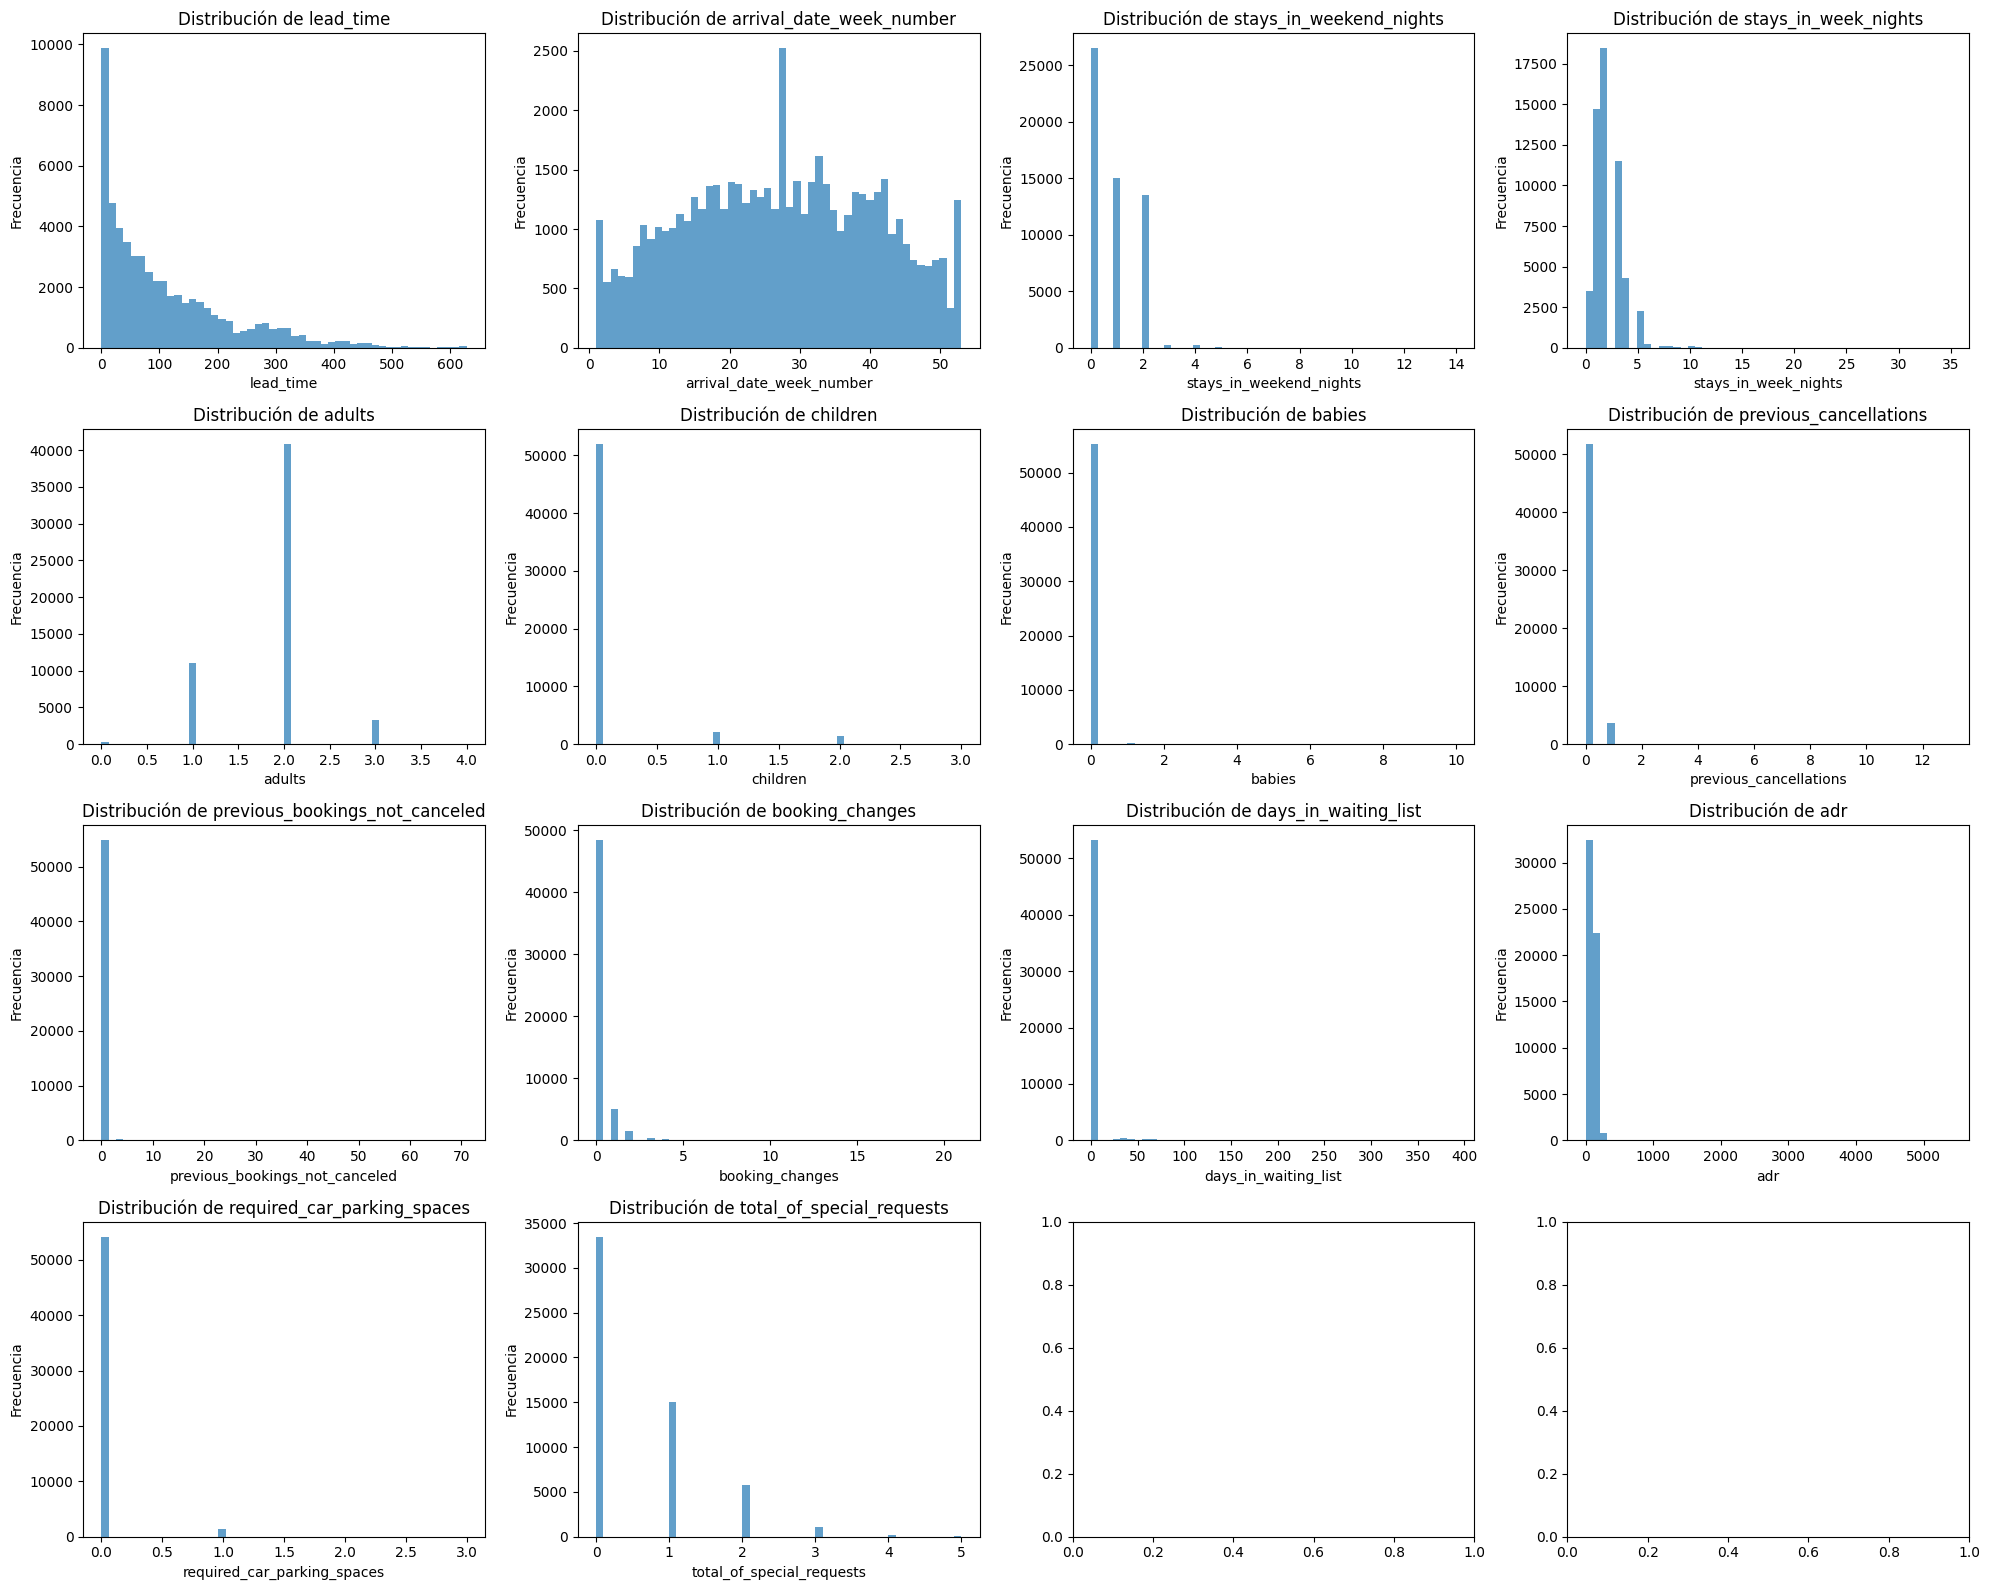

In [12]:
fig, axes = plt.subplots(4, 4, figsize=(20, 16))
axes = axes.ravel()

for i, col in enumerate(numeric_cols):
    if i < len(axes):
        axes[i].hist(df_pandas[col].dropna(), bins=50, alpha=0.7)
        axes[i].set_title(f'Distribución de {col}')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Frecuencia')

plt.tight_layout()
plt.savefig('distribucion_numericas.png', dpi=300, bbox_inches='tight')
plt.show()

Correlaciones

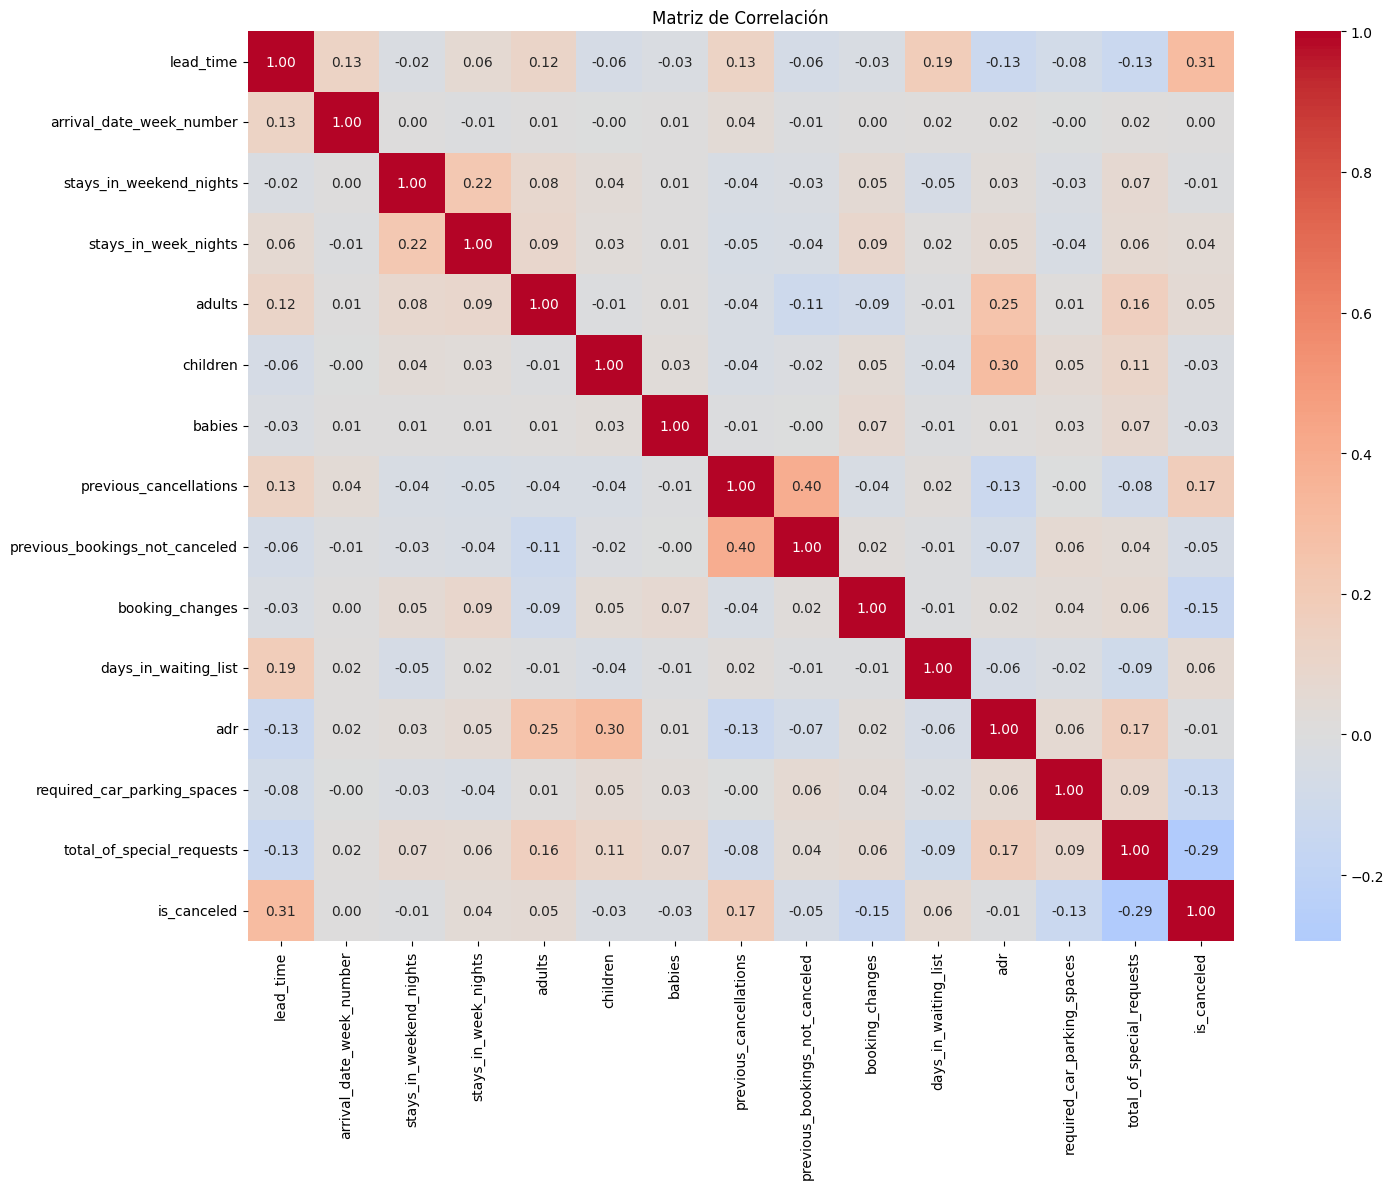

In [13]:
plt.figure(figsize=(15, 12))
correlation_matrix = df_pandas[numeric_cols + ['is_canceled']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Matriz de Correlación')
plt.tight_layout()
plt.savefig('correlacion_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

Box plots para detectar outliers

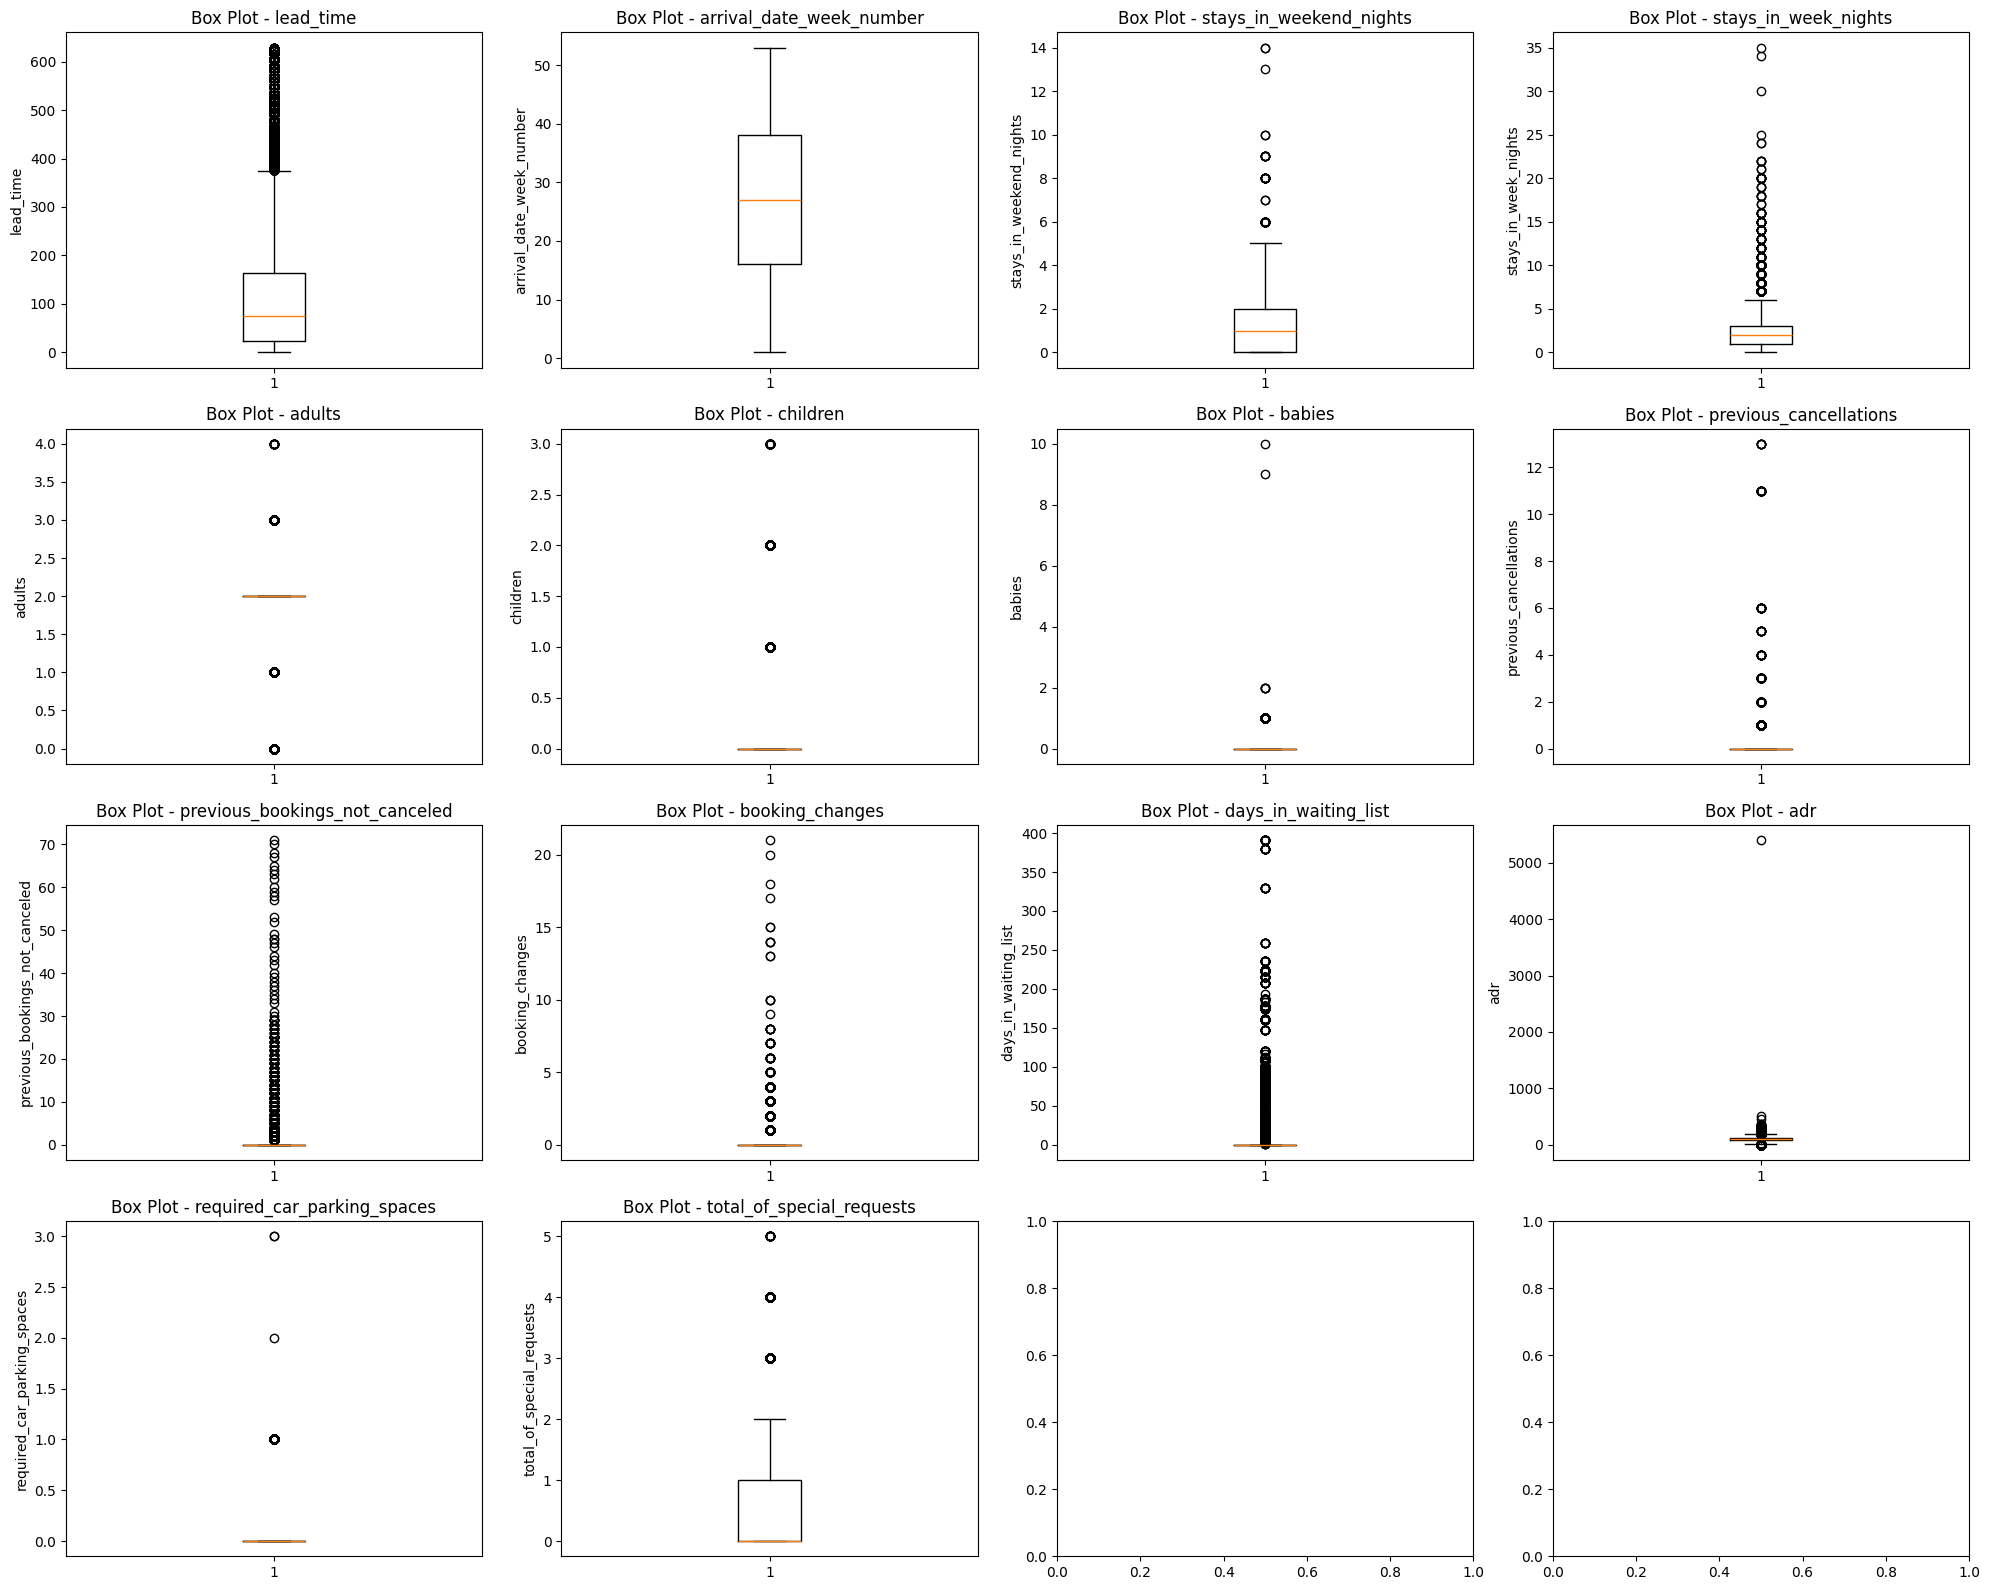

In [14]:
fig, axes = plt.subplots(4, 4, figsize=(20, 16))
axes = axes.ravel()

for i, col in enumerate(numeric_cols):
    if i < len(axes):
        axes[i].boxplot(df_pandas[col].dropna())
        axes[i].set_title(f'Box Plot - {col}')
        axes[i].set_ylabel(col)

plt.tight_layout()
plt.savefig('boxplots_outliers.png', dpi=300, bbox_inches='tight')
plt.show()

# Análisis de cancelaciones por variables categóricas

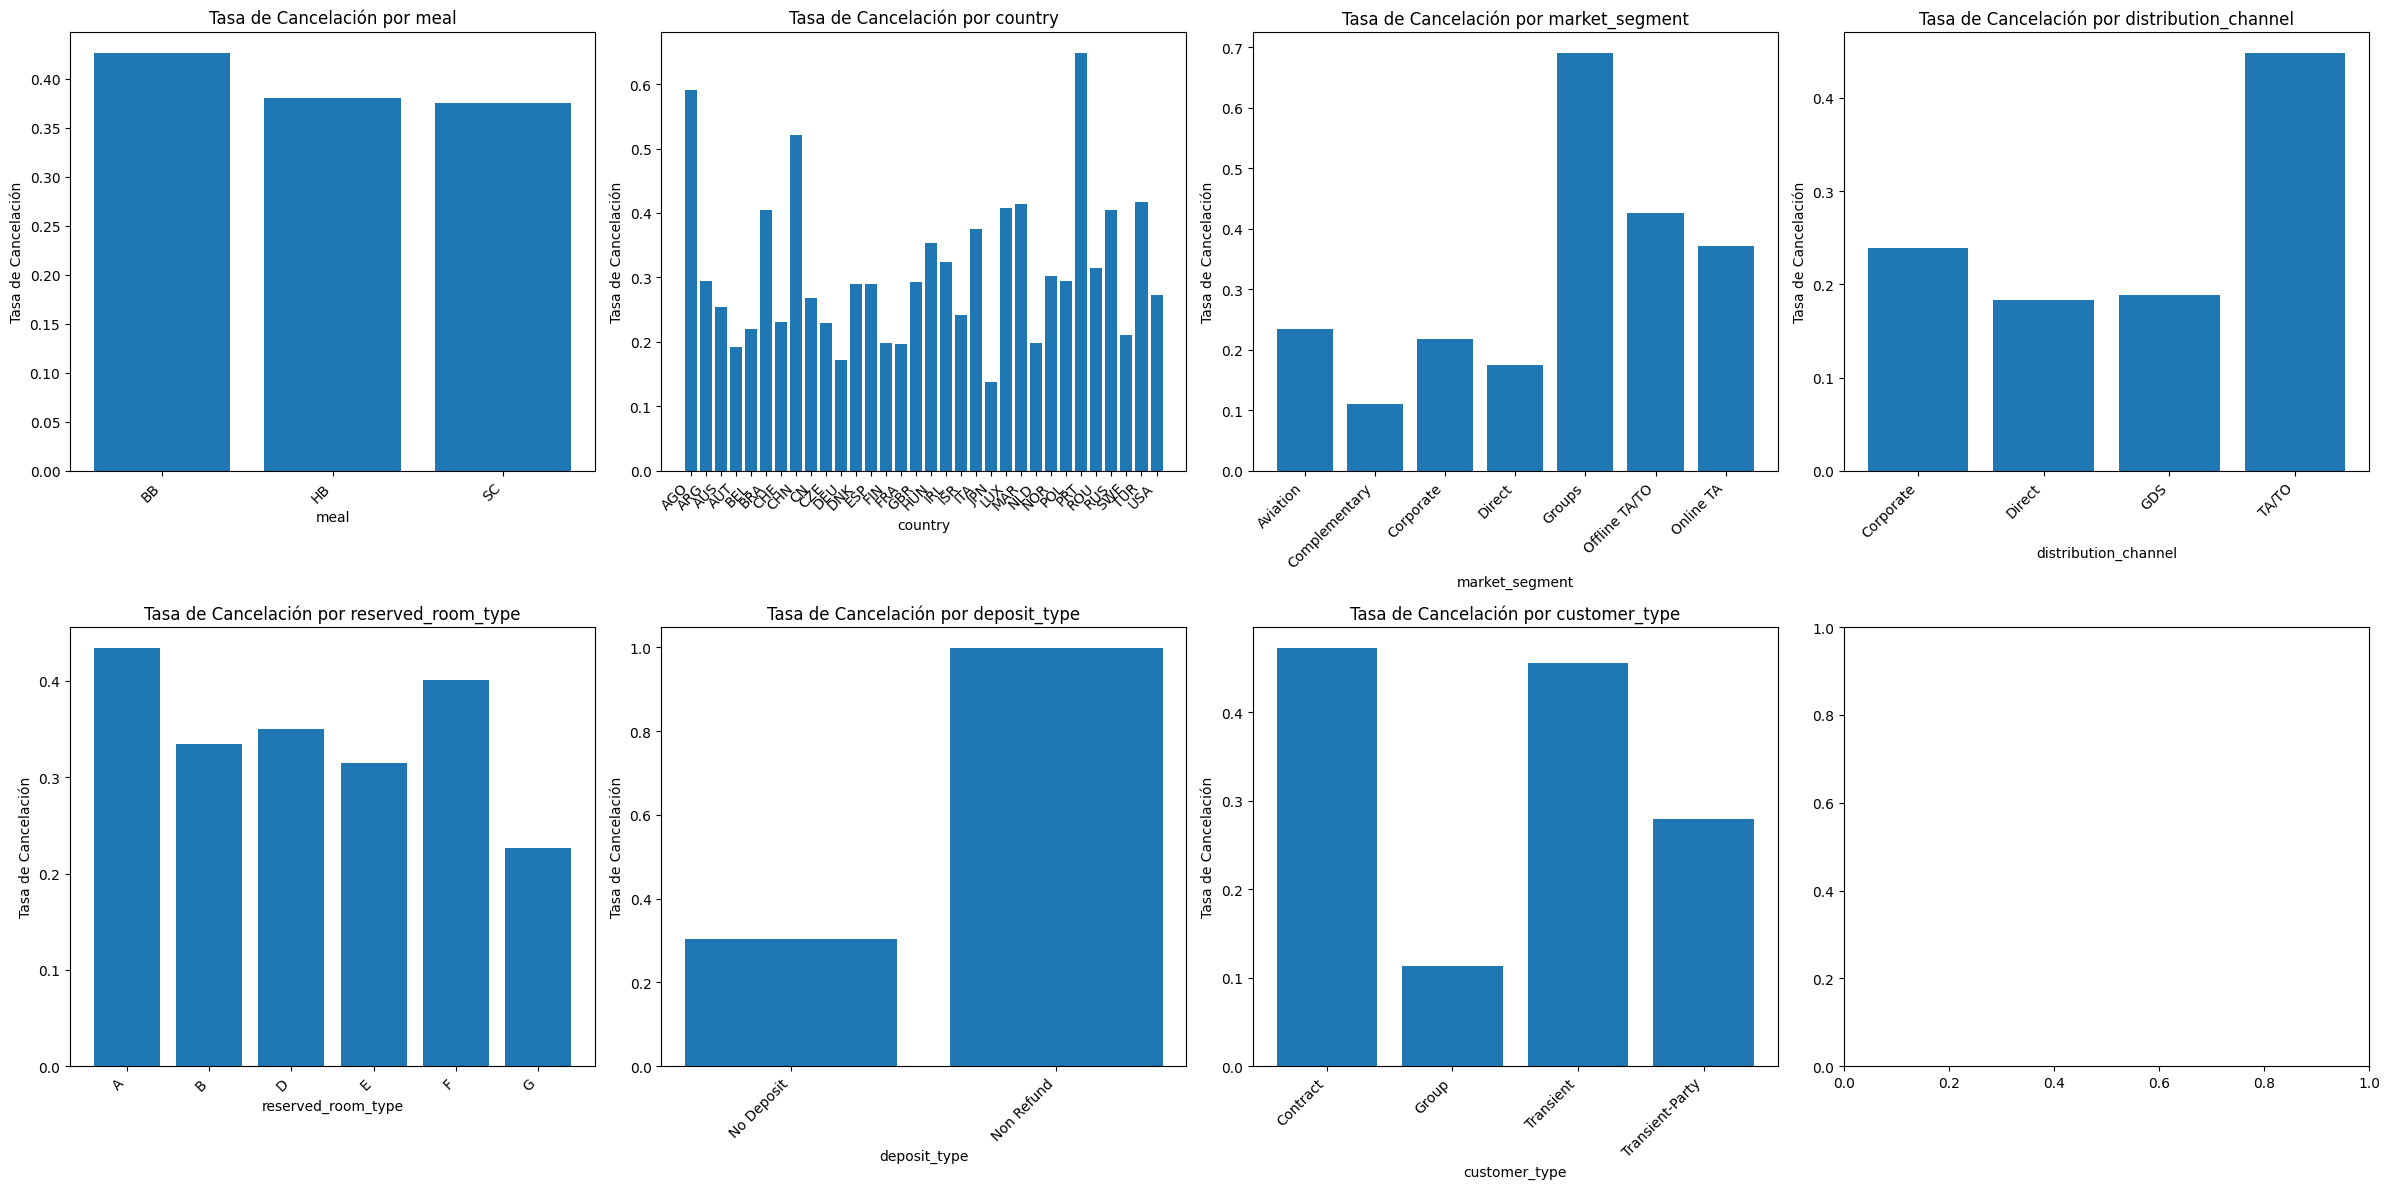


=== RESUMEN DEL ANÁLISIS EXPLORATORIO ===
1. Dataset con 55531 registros y 23 columnas
2. Variable objetivo balanceada: 41.62% cancelaciones
3. Presencia de valores nulos en 'children' principalmente
4. Variables numéricas con diferentes escalas - necesario normalizar
5. Variables categóricas con diferentes cardinalidades
6. Outliers detectados en varias variables numéricas


In [15]:
fig, axes = plt.subplots(2, 4, figsize=(24, 12))
axes = axes.ravel()

for i, col in enumerate(categorical_cols):
    if i < len(axes):
        cancel_rates = df_pandas.groupby(col)['is_canceled'].agg(['count', 'mean']).reset_index()
        cancel_rates = cancel_rates[cancel_rates['count'] >= 100]  # Filtrar categorías con pocos casos
        
        axes[i].bar(range(len(cancel_rates)), cancel_rates['mean'])
        axes[i].set_title(f'Tasa de Cancelación por {col}')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Tasa de Cancelación')
        axes[i].set_xticks(range(len(cancel_rates)))
        axes[i].set_xticklabels(cancel_rates[col], rotation=45, ha='right')

plt.tight_layout()
plt.savefig('cancelacion_por_categorias.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n=== RESUMEN DEL ANÁLISIS EXPLORATORIO ===")
print(f"1. Dataset con {df.count()} registros y {len(df.columns)} columnas")
print(f"2. Variable objetivo balanceada: {df_pandas['is_canceled'].mean():.2%} cancelaciones")
print("3. Presencia de valores nulos en 'children' principalmente")
print("4. Variables numéricas con diferentes escalas - necesario normalizar")
print("5. Variables categóricas con diferentes cardinalidades")
print("6. Outliers detectados en varias variables numéricas")

spark.stop()